In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from functions import *

# 1 Folder Data loading
The code is loading multiple CSV files from a specified folder path and converting them into pandas DataFrames.

In [2]:
folder_path = "data/e production=ep sanyo ep sanyo 003"
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

dataframes = []
dfarrnames = []

# Loop through the CSV files and load only those ending with "Format01=Kreis 5-064"
for csv_file in csv_files:
    if "Format01=Kreis" in csv_file:
        if "TBA_CU" in csv_file:
            dfarr = pd.read_csv(csv_file, skiprows=[1])
            dfarr['Zeit'] = dfarr['Zeit'].apply(convert_to_linear_time)
            dfarr['Zeit'] = dfarr['Zeit'] - dfarr['Zeit'].iloc[0]
            dfarr['Zeit'] = dfarr['Zeit'] / 3600
            dataframes.append(dfarr)
            dfarrnames.append(csv_file)

noFiles = 0
for i, dfarr in enumerate(dataframes):
    num_rows, num_columns = dfarr.shape
    print(f"DataFrame {i + 1} - Rows: {num_rows}, Columns: {num_columns}")
    noFiles += 1
print(noFiles)

DataFrame 1 - Rows: 24876, Columns: 18
DataFrame 2 - Rows: 24343, Columns: 18
DataFrame 3 - Rows: 24383, Columns: 18
DataFrame 4 - Rows: 25903, Columns: 18
DataFrame 5 - Rows: 25853, Columns: 18
DataFrame 6 - Rows: 26195, Columns: 18
DataFrame 7 - Rows: 26154, Columns: 18
DataFrame 8 - Rows: 27922, Columns: 18
DataFrame 9 - Rows: 27814, Columns: 18
DataFrame 10 - Rows: 28889, Columns: 18
DataFrame 11 - Rows: 34578, Columns: 18
DataFrame 12 - Rows: 34518, Columns: 18
DataFrame 13 - Rows: 36161, Columns: 18
DataFrame 14 - Rows: 37421, Columns: 18
DataFrame 15 - Rows: 38296, Columns: 18
DataFrame 16 - Rows: 38390, Columns: 18
DataFrame 17 - Rows: 40705, Columns: 18
DataFrame 18 - Rows: 41552, Columns: 18
18


test that data is loaded succesfully

In [3]:
num_rows, num_columns = dataframes[1].shape

print(f"Number of rows (length): {num_rows}")
print(f"Number of columns (width): {num_columns}")
dataframes[i].head()

Number of rows (length): 24343
Number of columns (width): 18


,Schritt,Zustand,Zeit,Programmdauer,Schrittdauer,Zyklus,Zyklusebene,Prozedur,Prozedurebene,AhAkku,AhLad,AhEla,AhStep,Energie,WhStep,Spannung,Strom,Temp7
0,4,PAU,0.000000,54.0,5.0,0,0,TBA_CUv2,0,0.0,0.0,0.0,0.0,0.0,0.0,3.674670,0.0,27.1875
1,4,PAU,0.002778,10065.0,10016.0,0,0,TBA_CUv2,0,0.0,0.0,0.0,0.0,0.0,0.0,3.674670,0.0,27.1875
2,4,PAU,0.005558,20075.0,20026.0,0,0,TBA_CUv2,0,0.0,0.0,0.0,0.0,0.0,0.0,3.673942,0.0,27.1875
3,4,PAU,0.008339,30081.0,30032.0,0,0,TBA_CUv2,0,0.0,0.0,0.0,0.0,0.0,0.0,3.674670,0.0,27.1875
4,4,PAU,0.011117,40077.0,40028.0,0,0,TBA_CUv2,0,0.0,0.0,0.0,0.0,0.0,0.0,3.674670,0.0,27.1875


### Crop The Values

In [4]:
filtered_dataframes = []

for df in dataframes:
    schritt_mask = ((df['Schritt'] == 4) | (df['Schritt'] == 5)) & (df['Zeit'] >= 10)
    start_index = df[schritt_mask]
    start_time = start_index.iloc[0]['Zeit']
    end_time = start_time + 4
    print(start_index.iloc[0]['Zeit'])

    time_mask = (df['Zeit'] >= start_time) & (df['Zeit'] <= end_time) & ((df['Schritt'] == 4) | (df['Schritt'] == 5))

    filtered_df = df[time_mask]
    filtered_dataframes.append(filtered_df)

16.605499999986755
16.08863611108727
15.884399999976159
16.862102777759233
16.62616111106343
16.812277777724795
16.479949999981457
20.227338888910083
19.587438888880943
19.16683055559794
18.732536111076673
17.8650361111429
17.039111111097867
17.960636111100516
17.238105555574098
16.626899999976157
16.147666666640177
16.033116666674616


### Plot all data from folder
The code snippet is defining a list `columns_to_plot` which contains the column numbers (indices) of the columns to be plotted. It then iterates over a list of dataframes (`dataframes`) and for each dataframe, it prints the graph number, calls a function `plot_threshold` passing the `columns_to_plot`, the current dataframe, and two threshold values start and end time as arguments. The variable `I` is used as a counter to keep track of the graph number.

Graph No. : 0
data/e production=ep sanyo ep sanyo 003\e production=ep sanyo 003=ZYK=Massenalterung=2013-01-16 070655=TBA_CU=TS010900  Format01=Kreis 5-061.csv


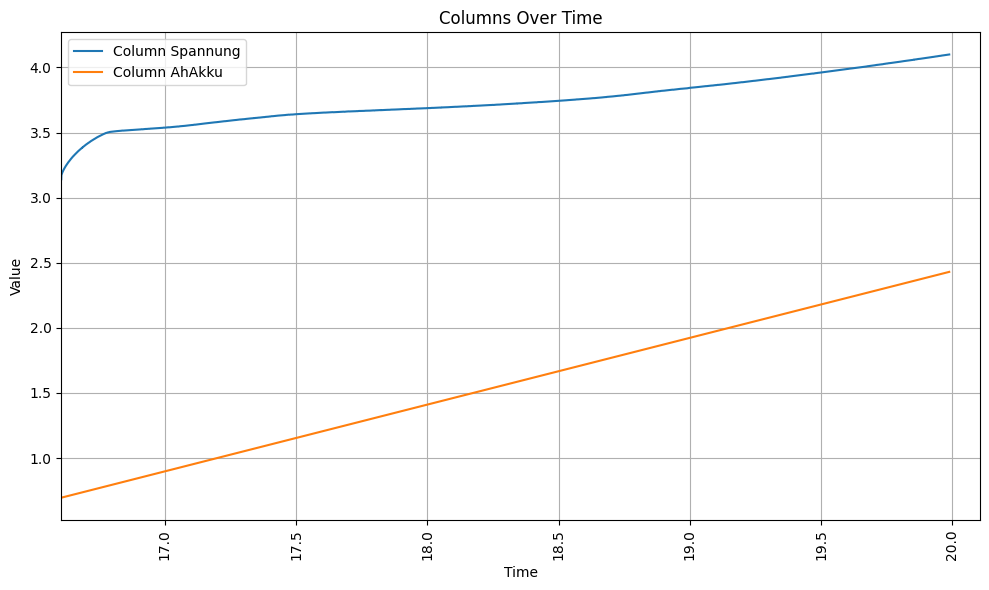

Graph No. : 1
data/e production=ep sanyo ep sanyo 003\e production=ep sanyo 003=ZYK=Massenalterung=2013-01-24 091535=TBA_CU=TS011296  Format01=Kreis 5-061.csv


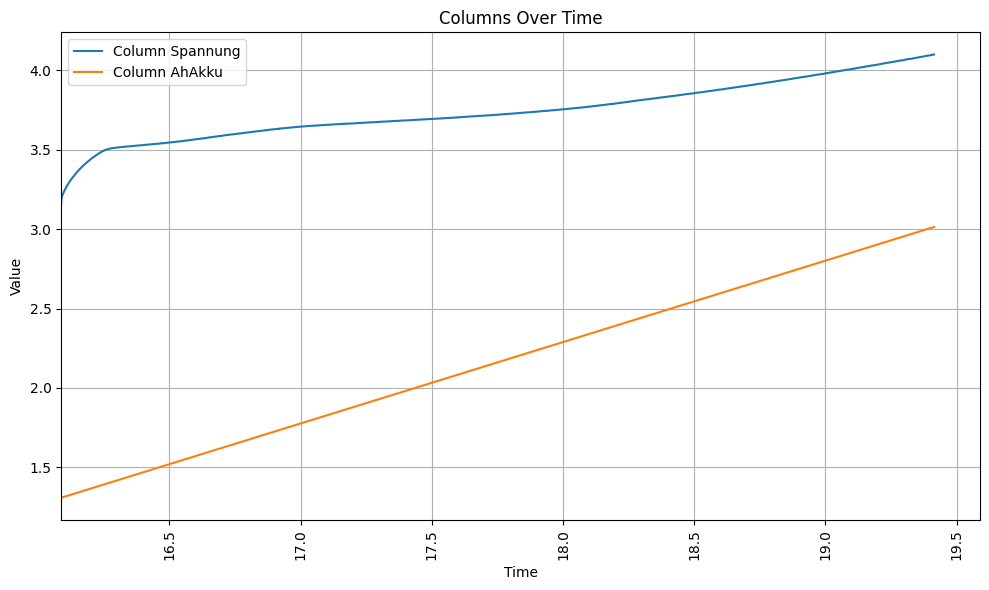

Graph No. : 2
data/e production=ep sanyo ep sanyo 003\e production=ep sanyo 003=ZYK=Massenalterung=2013-02-04 024645=TBA_CU=TS011762  Format01=Kreis 5-061.csv


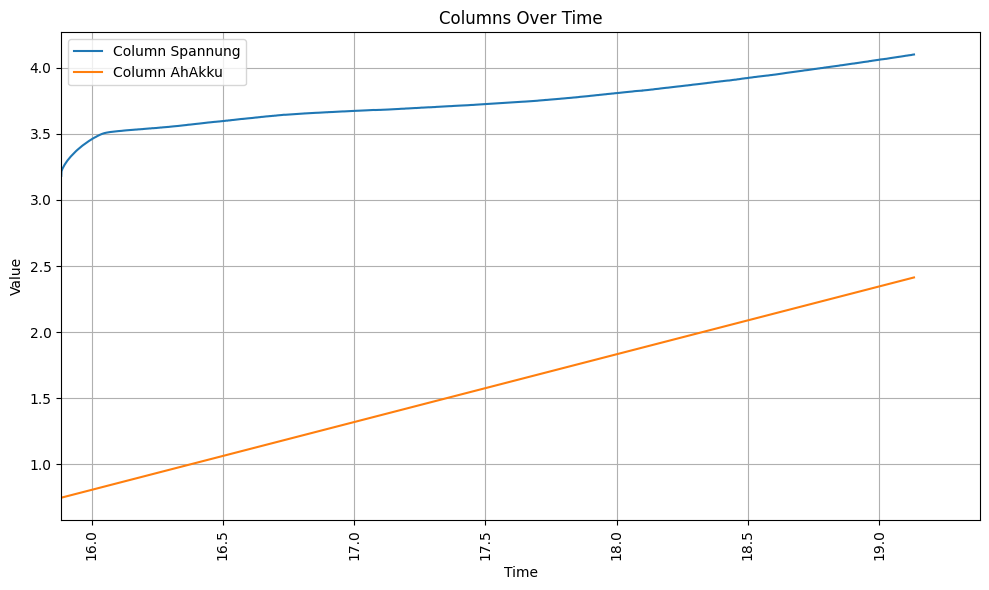

Graph No. : 3
data/e production=ep sanyo ep sanyo 003\e production=ep sanyo 003=ZYK=Massenalterung=2013-02-13 010926=TBA_CUv2=TS012200  Format01=Kreis 5-061.csv


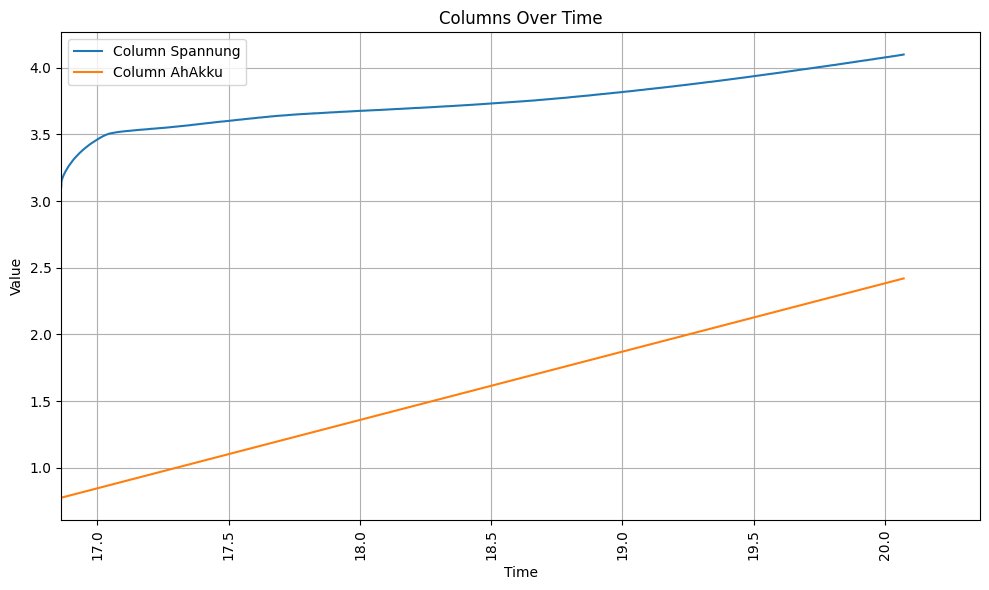

Graph No. : 4
data/e production=ep sanyo ep sanyo 003\e production=ep sanyo 003=ZYK=Massenalterung=2013-02-21 134051=TBA_CUv2=TS012696  Format01=Kreis 5-061.csv


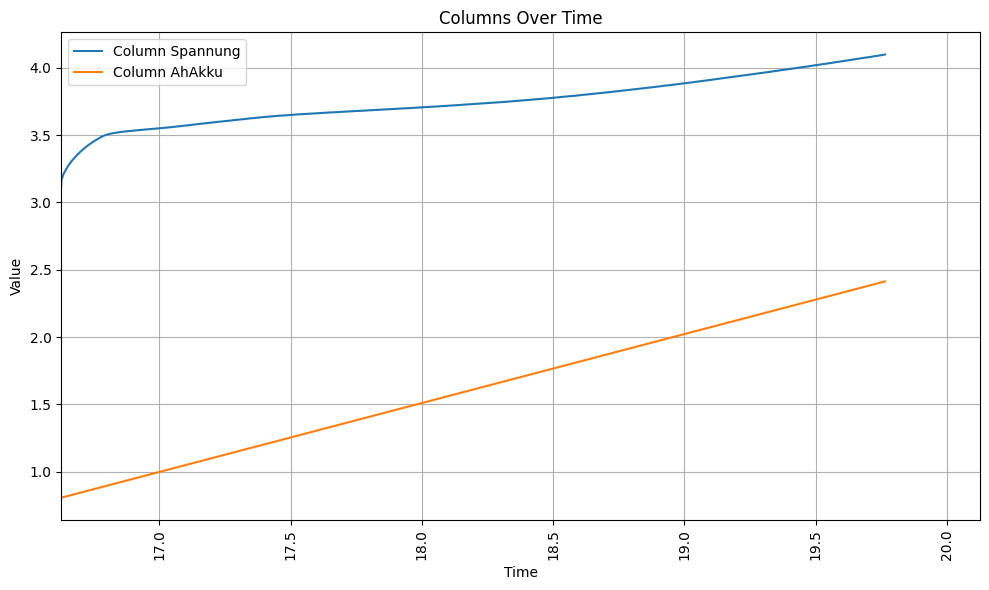

Graph No. : 5
data/e production=ep sanyo ep sanyo 003\e production=ep sanyo 003=ZYK=Massenalterung=2013-03-02 105730=TBA_CUv2=TS013136  Format01=Kreis 5-061.csv


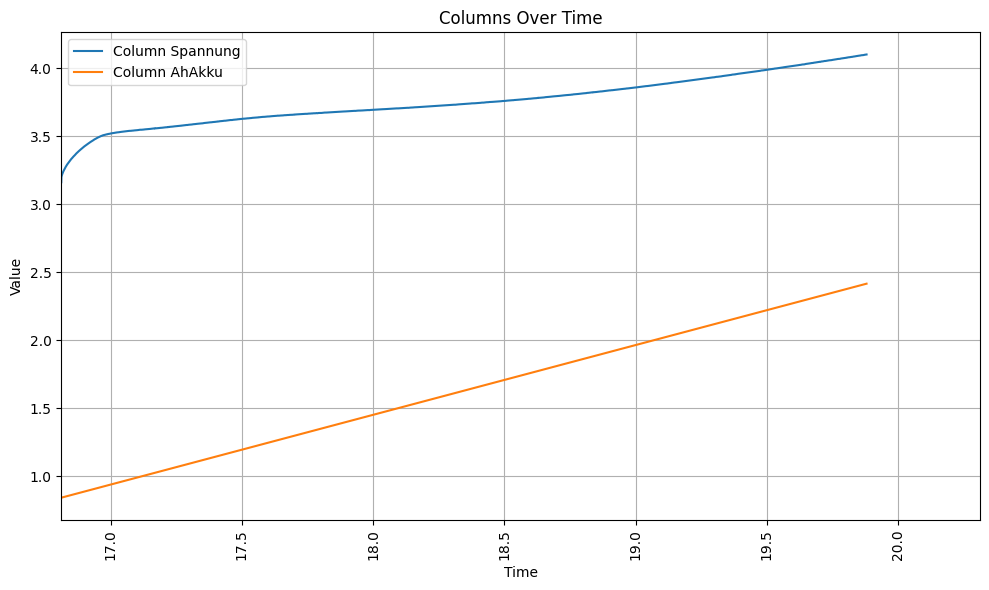

Graph No. : 6
data/e production=ep sanyo ep sanyo 003\e production=ep sanyo 003=ZYK=Massenalterung=2013-03-04 105913=TBA_CUv2=TS013214  Format01=Kreis 5-061.csv


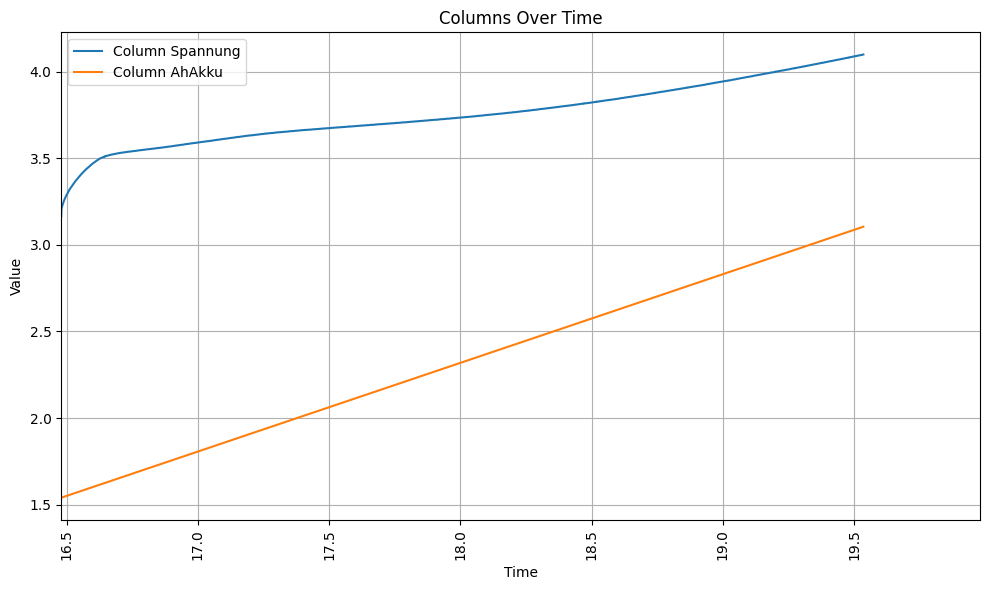

Graph No. : 7
data/e production=ep sanyo ep sanyo 003\e production=ep sanyo 003=ZYK=Massenalterung=2013-03-13 130307=TBA_CUv2=TS013734  Format01=Kreis 5-061.csv


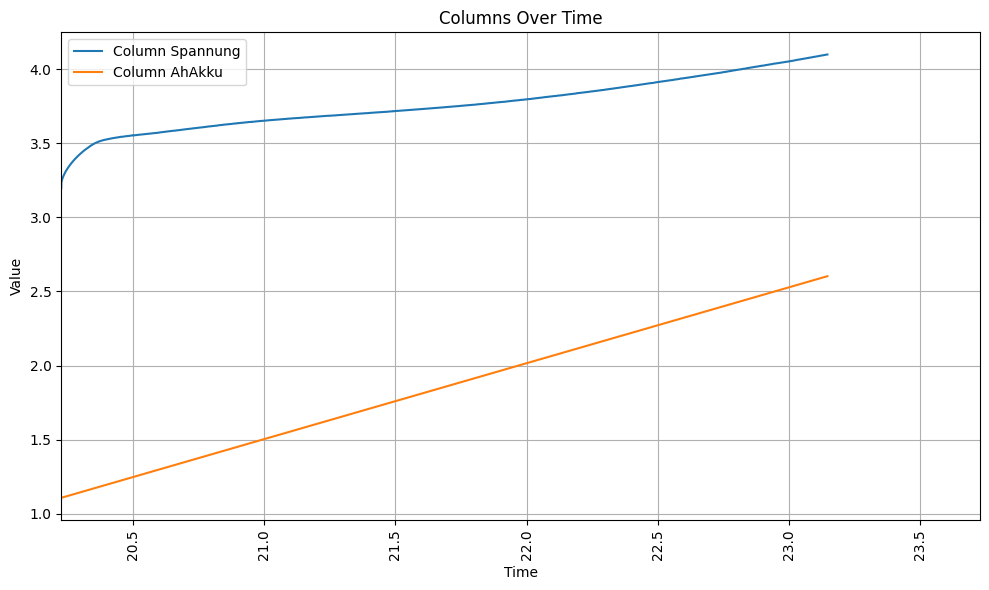

Graph No. : 8
data/e production=ep sanyo ep sanyo 003\e production=ep sanyo 003=ZYK=Massenalterung=2013-03-24 115345=TBA_CUv2=TS014400  Format01=Kreis 5-061.csv


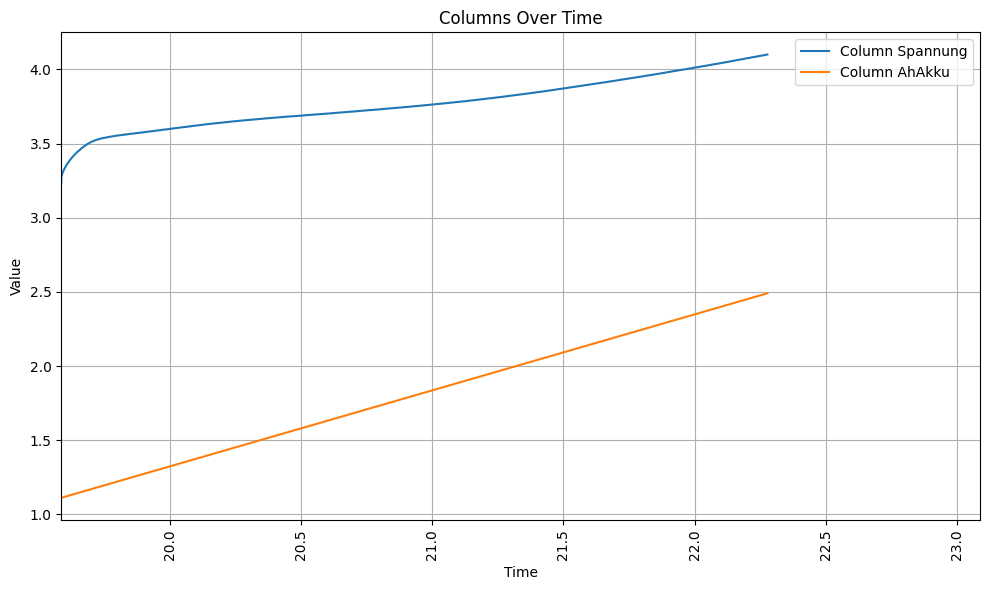

Graph No. : 9
data/e production=ep sanyo ep sanyo 003\e production=ep sanyo 003=ZYK=Massenalterung=2013-04-02 093350=TBA_CUv2=TS014813  Format01=Kreis 5-061.csv


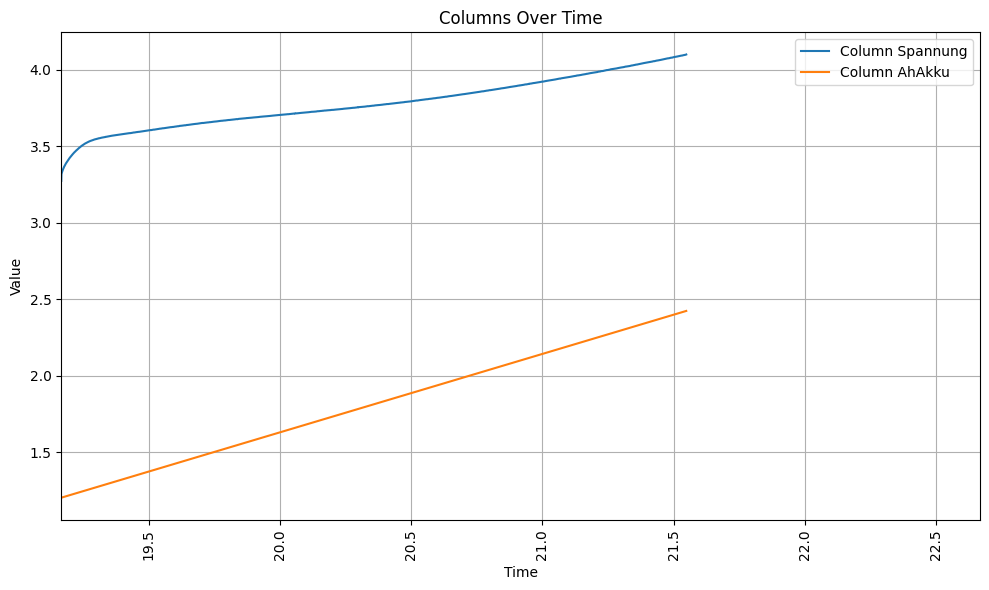

Graph No. : 10
data/e production=ep sanyo ep sanyo 003\e production=ep sanyo 003=ZYK=Massenalterung=2013-04-11 085101=TBA_CUv2=TS015272  Format01=Kreis 5-061.csv


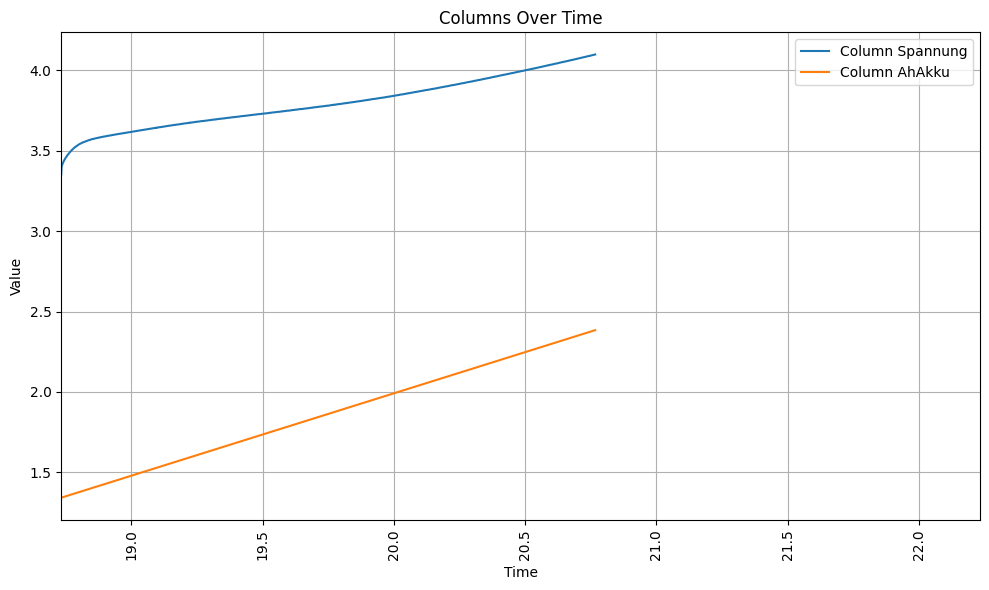

Graph No. : 11
data/e production=ep sanyo ep sanyo 003\e production=ep sanyo 003=ZYK=Massenalterung=2013-04-20 093825=TBA_CUv2=TS015934  Format01=Kreis 5-061.csv


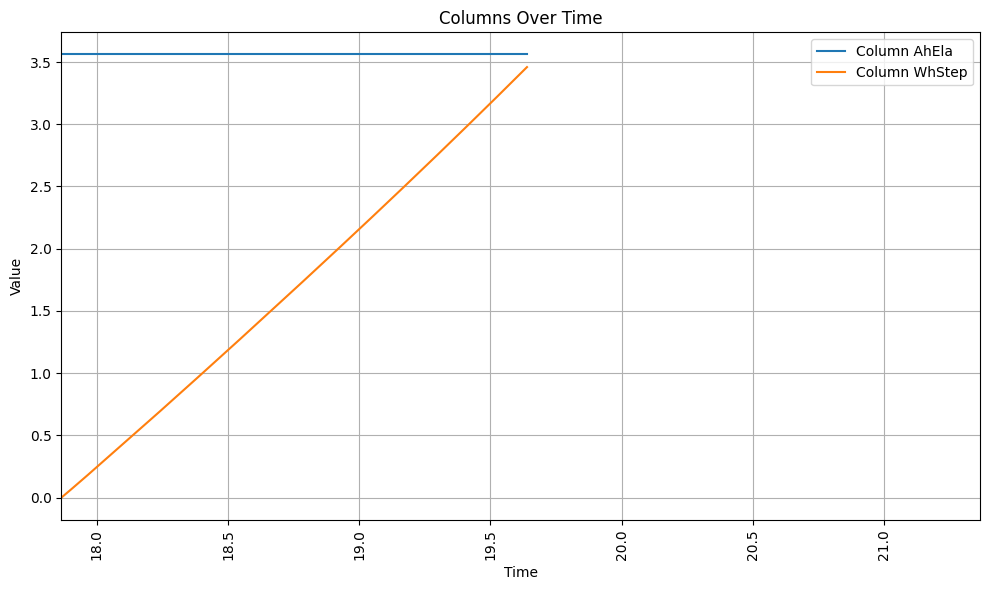

Graph No. : 12
data/e production=ep sanyo ep sanyo 003\e production=ep sanyo 003=ZYK=Massenalterung=2013-04-29 094449=TBA_CUv2=TS016436  Format01=Kreis 5-061.csv


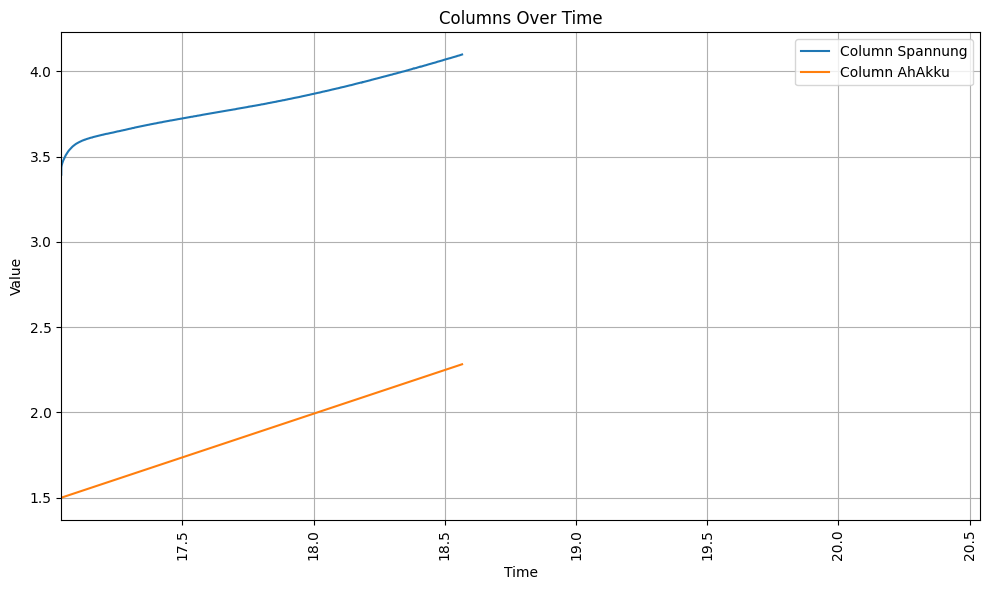

Graph No. : 13
data/e production=ep sanyo ep sanyo 003\e production=ep sanyo 003=ZYK=Massenalterung=2013-05-08 091302=TBA_CUv2=TS016942  Format01=Kreis 5-061.csv


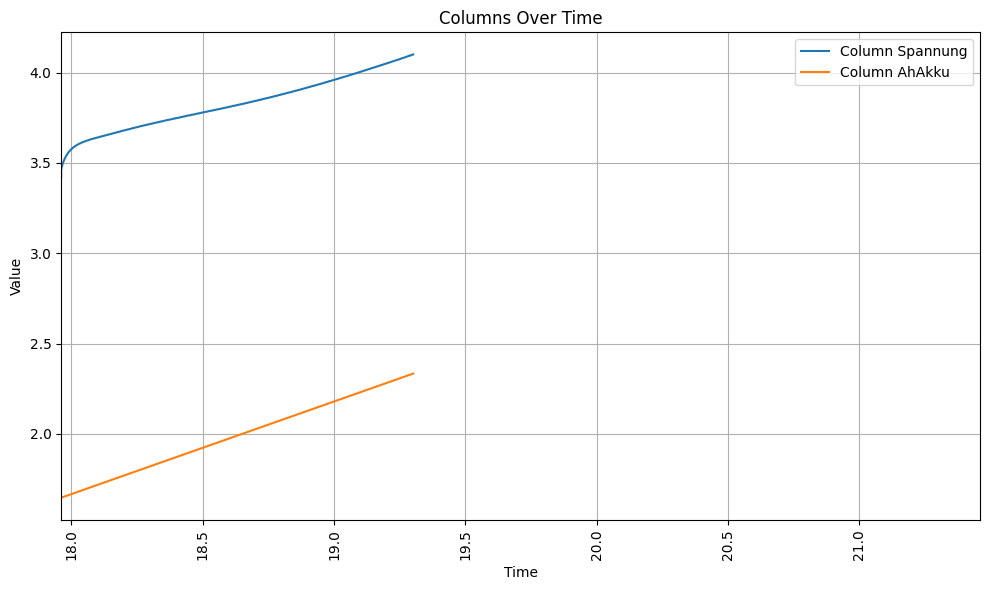

Graph No. : 14
data/e production=ep sanyo ep sanyo 003\e production=ep sanyo 003=ZYK=Massenalterung=2013-05-17 194114=TBA_CUv2=TS017494  Format01=Kreis 5-061.csv


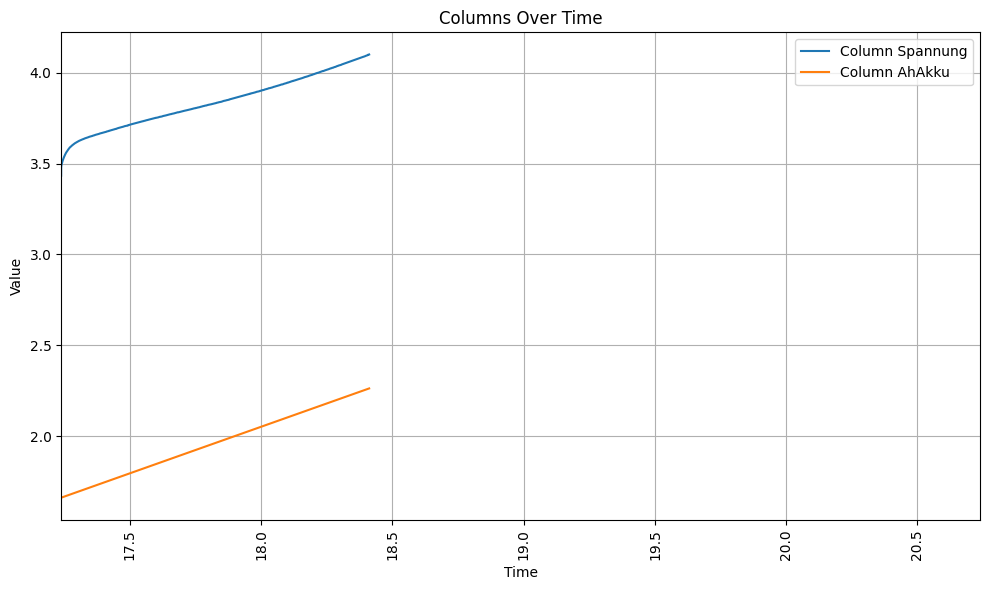

Graph No. : 15
data/e production=ep sanyo ep sanyo 003\e production=ep sanyo 003=ZYK=Massenalterung=2013-05-28 011115=TBA_CUv2=TS017936  Format01=Kreis 5-061.csv


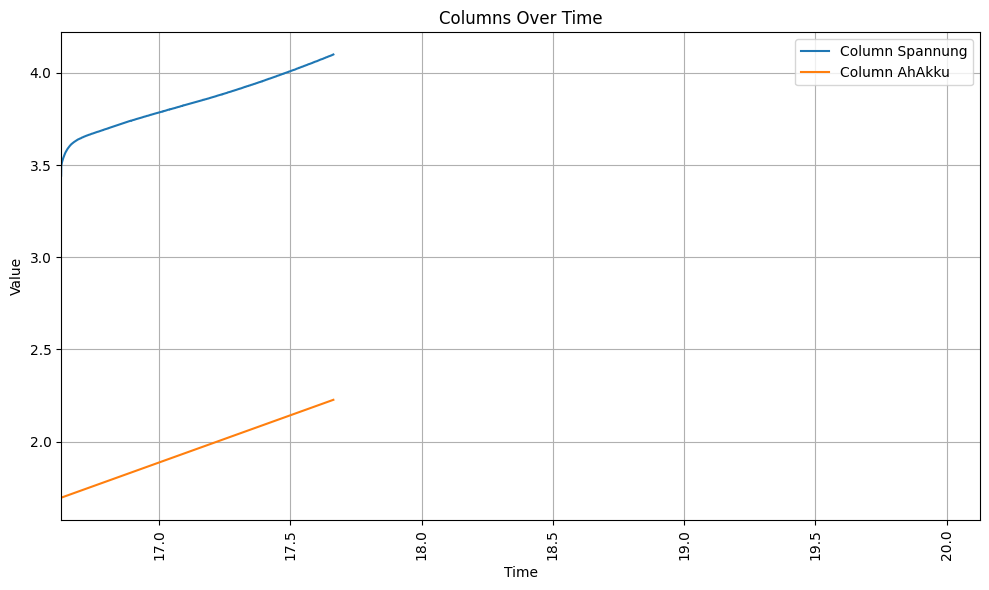

Graph No. : 16
data/e production=ep sanyo ep sanyo 003\e production=ep sanyo 003=ZYK=Massenalterung=2013-06-05 142754=TBA_CUv2=TS018438  Format01=Kreis 5-061.csv


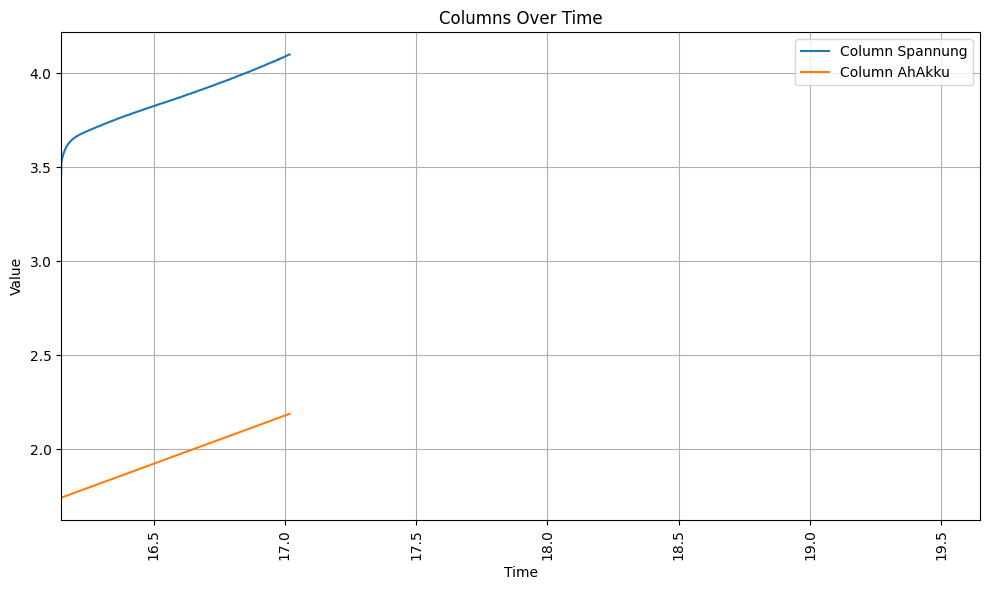

Graph No. : 17
data/e production=ep sanyo ep sanyo 003\e production=ep sanyo 003=ZYK=Massenalterung=2013-06-13 195721=TBA_CUv2=TS018879  Format01=Kreis 5-061.csv


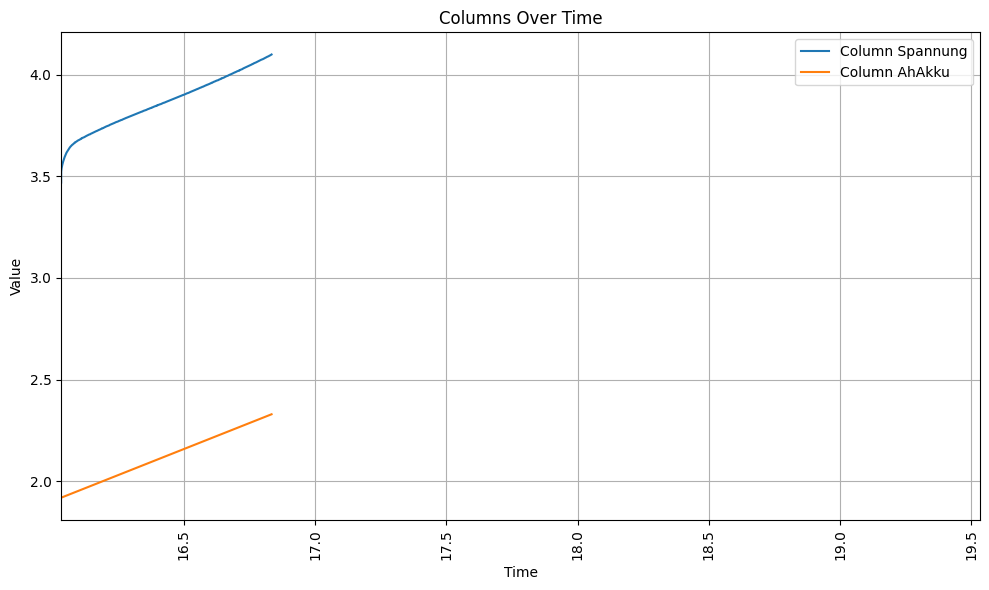

In [5]:
columns_to_plot = [15,9] 
I = 0
for i in dataframes:
    print("Graph No. :",I)
    print(dfarrnames[I])
    start_time = filtered_dataframes[I].iloc[0]['Zeit']
    plot_threshold(columns_to_plot, filtered_dataframes[I],start_time,start_time+3.5)
    I=I+1

# 2 Capacity Analysis
### Max Min Value extration
this code is extracting the `maximun` and `minimum` value between the start and end time for all files in folder.It also captures the capacity using `capacity = max - min` and store the data in the array.  

In [6]:
columns_to_plot = [9]

max_values_list = []
min_values_list = []
capacity_values_list = []
iteration_range = range(len(dataframes))

for df in filtered_dataframes:
    max_values = max_threshold(columns_to_plot, df, 0, 35)
    min_values = min_threshold(columns_to_plot, df, 0, 35)
    
    max_values_list .append(max_values)
    min_values_list.append(min_values)
    capacity = max_values[0]-min_values[0]
    capacity_values_list.append(capacity)

print(max_values_list)
print(min_values_list)
print(capacity_values_list)
print(iteration_range)

[[2.429980613553198], [3.013812668221362], [2.413739104173146], [2.419957807134779], [2.413570062675717], [2.415797072051646], [3.104831463730079], [2.603207115775149], [2.49024913638641], [2.424683831970469], [2.38396501790703], [3.459240366959421], [2.282668797455699], [2.333855410965043], [2.262210162014526], [2.226529315834341], [2.188608064847358], [2.32885644590715]]
[[0.6955522895186732], [1.309175184236665], [0.7483237029409793], [0.7750079195338913], [0.8061823367434044], [0.8434984910772982], [1.539782178642781], [1.107325807188317], [1.11171568595455], [1.204569442208594], [1.341476605150092], [1.064329856546864e-05], [1.500045402775868], [1.646932432957328], [1.660909804253606], [1.69550388414973], [1.74247282993565], [1.918197997540119]]
[1.7344283240345248, 1.704637483984697, 1.665415401232167, 1.644949887600888, 1.6073877259323126, 1.5722985809743477, 1.5650492850872981, 1.4958813085868319, 1.37853345043186, 1.220114389761875, 1.042488412756938, 3.4592297236608553, 0.782

### Extract Requried data
`skip_indeces` are thoese which is creating problem in graph

In [7]:
skip_indices = [11]

# Use list comprehension to skip specific indices
extracted_capacity_values = [value for i, value in enumerate(capacity_values_list) if i not in skip_indices]

iteration_range = range(len(extracted_capacity_values))

print(extracted_capacity_values)
print(iteration_range)

[1.7344283240345248, 1.704637483984697, 1.665415401232167, 1.644949887600888, 1.6073877259323126, 1.5722985809743477, 1.5650492850872981, 1.4958813085868319, 1.37853345043186, 1.220114389761875, 1.042488412756938, 0.7826233946798309, 0.6869229780077151, 0.60130035776092, 0.531025431684611, 0.44613523491170803, 0.4106584483670308]
range(0, 17)


### ploting the capacity
It plot the capacity over days asuming that the each file in the folder is of one day.

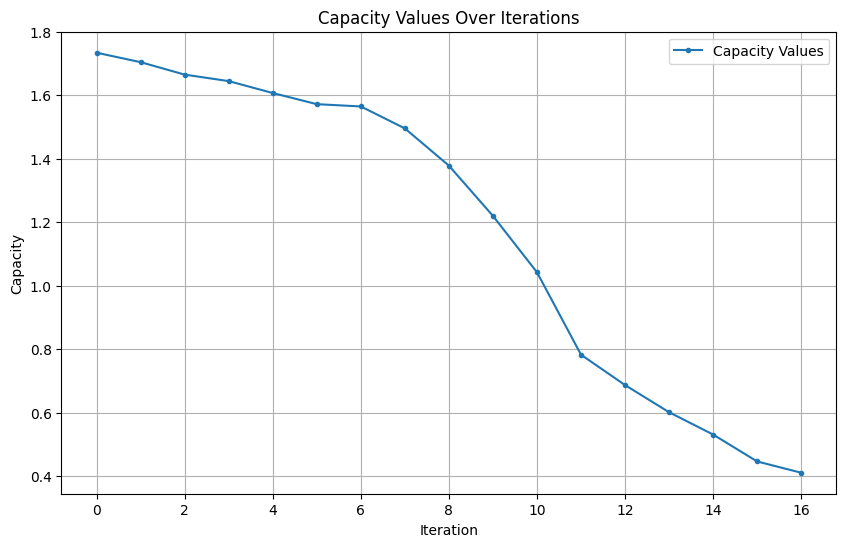

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(iteration_range, extracted_capacity_values, label='Capacity Values', marker='.')
plt.xlabel('Iteration')
plt.ylabel('Capacity')
plt.legend()
plt.title('Capacity Values Over Iterations')
plt.grid(True)

plt.show()

### Save the graph data
this code is saving the data of the graphs for later use 
how to use
-  If you are using it first time  clear the data in `extracted_capacity_values.csv`
- first get your desired output on the above graph
- run this code only once
- it will store it in csv that you can later use to display all graphs at one

In [9]:
csv_filename = "extracted_capacity_values_2.csv"

with open(csv_filename, 'a', newline='') as csvfile:
    values_as_string = ",".join(map(str, extracted_capacity_values))
    csvfile.write(values_as_string + "\n")

print(f"Values have been appended to the CSV file '{csv_filename}'")

Values have been appended to the CSV file 'extracted_capacity_values_2.csv'


### Ploting all Cell Data
This will take csv of the above code block and plot all the data that is stored aleady

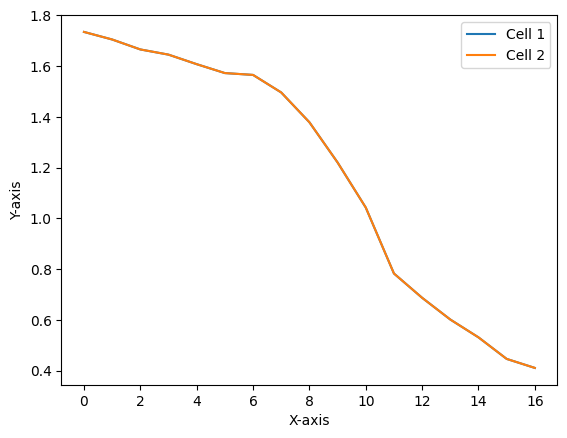

In [10]:
csv_file = 'extracted_capacity_values_2.csv'

csvdf = pd.read_csv(csv_file, header=None)

num_rows, num_columns = csvdf.shape

for row in range(num_rows):
    plt.plot(csvdf.iloc[row], label=f'Cell {row + 1}')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

plt.show()

# 3 Volatge Charging analysis

### Ploting Voltage
`data_extract` is the array of `(dataframe,starttime)`
- `starttime` is  the that you will place manully by using data above code output
- try to use first most value of the repected data frame if it is not working use the last one or randomly
- you can look above 35 graphs to figure out the proper value of  `starttime`
- `dataframe` is the correct that you want to include in the ploting 

Skipping index:  11


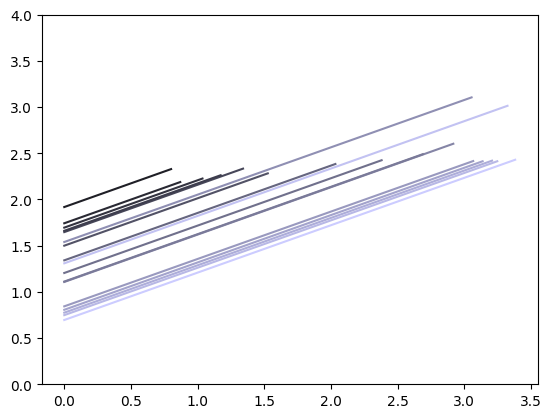

In [11]:
columns_to_plot = [9] 

plt1 = plt
i=0

for i,dataframe in enumerate(filtered_dataframes):
    if i not in skip_indices:
        start_time = filtered_dataframes[i].iloc[0]['Zeit']
        plot_threshold_same_plot(columns_to_plot, filtered_dataframes[i], start_time, start_time+4, plt1, y_min=0, y_max=4,i=i)
    else:
        print("Skipping index: ",i)
i=i+1

plt1.show()

### Croping Data

In [12]:
import os
import csv

output_directory = "extracted_data"
os.makedirs(output_directory, exist_ok=True)

In [16]:
csv_filename = os.path.join(output_directory, f"extracted data.csv")

I = 0
for index,dataframe in enumerate(filtered_dataframes):
    if index in skip_indices:
        print(f"Skipping index: {index}")
        continue
    ahakku = dataframe['AhAkku']
    ahakku = ahakku.to_numpy()
    ahakku = np.linspace(ahakku.min(), ahakku.max(), num=100)

    data = {'AhAkku{}'.format(i+1): value for i, value in enumerate(ahakku)}
    data['Capacity'] = extracted_capacity_values[I]


    with open(csv_filename, 'a', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=data.keys())
        writer.writerow(data)
        # if index == 0:
        #     writer.writeheader()

    I=I+1

print(f"Saved CSV file: {csv_filename}")

Skipping index: 11
Saved CSV file: extracted_data\extracted data.csv
